u 	 [[2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
p 	 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]
solving  <TransportModels.staggeredTransport_u object at 0x7fc9fc3b7970>


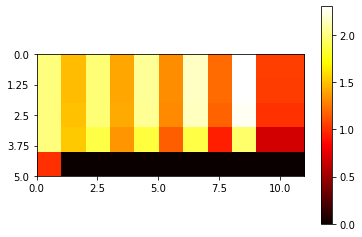

u 	 [[ 2.00000000e+00  1.49083414e+00  1.98186560e+00  1.42073862e+00
   2.06207325e+00  1.32918911e+00  2.16677706e+00  1.20957270e+00
   2.30343990e+00  1.05325175e+00  1.05325175e+00]
 [ 2.00000000e+00  1.49153544e+00  1.98259129e+00  1.42139178e+00
   2.06304929e+00  1.32927427e+00  2.16732318e+00  1.20844365e+00
   2.30268104e+00  1.05024133e+00  1.05024133e+00]
 [ 2.00000000e+00  1.50274710e+00  1.98341744e+00  1.42605794e+00
   2.05769536e+00  1.32164376e+00  2.15233832e+00  1.18456562e+00
   2.27556452e+00  1.00819556e+00  1.00819556e+00]
 [ 2.00000000e+00  1.53042939e+00  1.87193593e+00  1.35589600e+00
   1.85381777e+00  1.16691144e+00  1.87964874e+00  9.50309034e-01
   1.96126495e+00  6.88246376e-01  6.88246376e-01]
 [ 1.00000000e+00  7.53042939e-16  1.87193593e-16  1.35589600e-16
   1.85381777e-16  1.16691144e-16  1.87964874e-16  9.50309034e-17
   1.96126495e-16 -1.93117536e-15 -1.93117536e-31]]
solving  <TransportModels.staggeredTransport_v object at 0x7fc9b2b463a0>


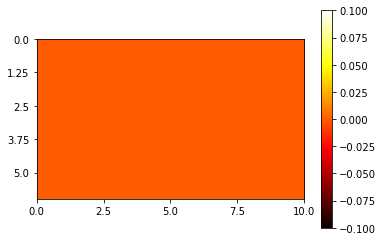

v 	 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0.]
 [ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0.]
 [ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0.]
 [ 0. -0.  0. -0.  0. -0.  0. -0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
solving  <PressureModels.Pressure object at 0x7fc9b2b465e0>


KeyboardInterrupt: 

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

import numpy as np
import Odin as backend

# validation test for incompressible flow

geom = backend.createGeometry( 'rectangle', [10,5] )
mesh = backend.createMesh( geom, res=1 )

# make just a list, give a name as optional parameter to flow model
# make this a flowmodeles constructor with kwargs here and then remove simulation instance
myFlowModels = {
    #backend.FlowModels.ConstPresGrad(depVariableName='p'),
   'u' : backend.TransportModels.staggeredTransport_u,
   'v' : backend.TransportModels.staggeredTransport_v,
    'p' : backend.PressureModels.Pressure
}

passiveFields = {
    # 'u' : 'faces_u',
    # 'v' : 'faces_v'
    #'p' : 'scalarCV'
}

#remove 'Simulation'. I don't need it
sim1 = backend.Simulation(flowmodels=myFlowModels, mesh=mesh, geometry=geom, passiveFields=passiveFields )

myFields = sim1.getFieldRegistry()

myFlowModels['u'].setDiffusionCoefficient(0.1)
myFlowModels['v'].setDiffusionCoefficient(0.1)


u = myFields['u']
u.data.fill(3.0)
#u.defineBoundaryCondition(boundaryName='top', boundaryType='fixedValue', value=0)
u.defineBoundaryCondition(boundaryName='bottom', boundaryType='fixedValue', value=0)

u.defineBoundaryCondition(boundaryName='top', boundaryType='zeroGradient')
# u.defineBoundaryCondition(boundaryName='bottom', boundaryType='zeroGradient')
u.defineBoundaryCondition(boundaryName='left', boundaryType='fixedValue', value=2 )
u.defineBoundaryCondition(boundaryName='right', boundaryType='zeroGradient')
print("u \t", u.data)

v = myFields['v']
v.data.fill(0.0)
v.defineBoundaryCondition(boundaryName='top', boundaryType='fixedValue', value=0)
v.defineBoundaryCondition(boundaryName='bottom', boundaryType='fixedValue', value=0)
v.defineBoundaryCondition(boundaryName='left', boundaryType='fixedValue', value=0 )
v.defineBoundaryCondition(boundaryName='right', boundaryType='zeroGradient')

p = myFields['p']
p.data.fill(0.0)
p.defineBoundaryCondition(boundaryName='top', boundaryType='zeroGradient')
p.defineBoundaryCondition(boundaryName='bottom', boundaryType='zeroGradient')
p.defineBoundaryCondition(boundaryName='left', boundaryType='zeroGradient')
p.defineBoundaryCondition(boundaryName='right', boundaryType='fixedValue', value=2)
print("p \t", p.data)


u.data = sim1.solve(u)
sim1.display(u,mesh)
print("u \t", u.data)

v.data = sim1.solve(v)
sim1.display(v,mesh)
print("v \t", v.data)

p.data = p.data - sim1.solve(p)
sim1.display(p,mesh)
print("p \t", p.data)



In [ ]:
# shutting the interpreter down, so I can a fresh instance next time.
# my modules are automatically checked for updates
import os
os._exit(00)
